In [2]:
import json
import pandas as pd
import numpy as np

In [3]:
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

In [4]:
lst_dics =[]
with open('News_Category_Dataset_v2.json', mode='r',errors='ignore') as json_file:
    for dic in  json_file:
        lst_dics.append(json.loads(dic))

lst_dics[0]

{'category': 'CRIME',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'authors': 'Melissa Jeltsen',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'short_description': 'She left her husband. He killed their children. Just another day in America.',
 'date': '2018-05-26'}

The original dataset contains over 30 categpries, but fo rhte pupose of this tutorial, I will work wiath a subset of 3 : Entertainment, politics and tech

In [7]:
dtf= pd.DataFrame(lst_dics)
dtf = dtf[dtf["category"].isin(['ENTERTAINMENT','POLITICS','TECH'])][["category","headline"]]
dtf = dtf.rename(columns={"category":"y", "headline":"text"})
dtf.sample(5)

,y,text
195672,TECH,Facebook Tightens Hold On 'Book' Trademark Wit...
90253,POLITICS,Why Obamacare Premiums Will Probably Rise More...
26897,POLITICS,Here's All The Evidence Donald Trump Has Produ...
83367,POLITICS,Scott Walker: Don't Focus On 'Racial Discord' ...
71447,POLITICS,MSNBC Host To Rick Santorum: What Are You Doin...


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import nltk
import re


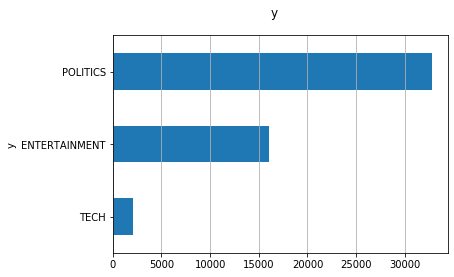

In [9]:
fig ,ax =plt.subplots()
fig.suptitle("y", fontsize=12)
dtf["y"].reset_index().groupby("y").count().sort_values(by="index").plot(kind="barh",legend=False,ax=ax).grid(axis='x')
plt.show()

In [10]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True,lst_stopwords=None):
    text = re.sub(r'[^\w\s]','',str(text).lower().strip())
    lst_text = text.split()
    
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]
    
    if flg_stemm==True:
        ps= nltk.stem.poter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
    if flg_lemm ==True:
        lem =nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
        
    text=" ".join(lst_text)
    return text

In [13]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
dtf["text_clean"]= dtf["text"].apply(lambda x:utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords= lst_stopwords))
dtf.head(5)

,y,text,text_clean
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,smith join diplo nicky jam 2018 world cup offi...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,hugh grant marries first time age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blast castrato adam schiff democrat...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies us donald trump poop bag pi...
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,morgan freeman devastated sexual harassment cl...


In [17]:
dtf_train, dtf_test =model_selection.train_test_split(dtf, test_size=0.3)

y_train = dtf_train["y"].values
y_test= dtf_test["y"].values

## BOW

In [18]:
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [23]:
corpus= dtf_train["text_clean"]
vectorizer.fit(corpus)
X_train =vectorizer.transform(corpus)
dic_vocabulary  =vectorizer.vocabulary_

In [69]:
X_train.shape

(35615, 10000)

In [74]:
for c in X_train[:4]:
    print(c)

  (0, 9051)	0.38881361055799013
  (0, 9025)	0.11522521918463635
  (0, 6646)	0.41476129334022327
  (0, 6644)	0.2566683972249514
  (0, 6100)	0.3044146679045372
  (0, 5513)	0.2718610097403792
  (0, 3504)	0.3816622983095077
  (0, 2611)	0.16032233168221036
  (0, 2609)	0.1597462173572095
  (0, 2535)	0.3850887957635604
  (0, 1040)	0.2930584161894373
  (0, 9374)	0.2541666264341995
  (0, 8322)	0.2931773012748785
  (0, 8310)	0.19725032964870043
  (0, 8161)	0.35969521384099923
  (0, 7263)	0.3256291529063334
  (0, 6342)	0.2974244849511878
  (0, 6136)	0.23679449837619412
  (0, 5280)	0.36764226113770637
  (0, 4444)	0.3401919480025328
  (0, 4006)	0.23459379720066273
  (0, 277)	0.35307946604150703
  (0, 8510)	0.42556007947169167
  (0, 7967)	0.4539600573712988
  (0, 7613)	0.4539600573712988
  (0, 6575)	0.3870937334854399
  (0, 3125)	0.2815128330863139
  (0, 2073)	0.42148323535694987
  (0, 7406)	0.4104862220097155
  (0, 7405)	0.3210765869524095
  (0, 4069)	0.39278215693868485
  (0, 3400)	0.2612559814989

In [76]:
y = dtf_train["y"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()
    

In [77]:
for cat in np.unique(y):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(dtf_features[dtf_features["y"]==cat]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["y"]==cat]["feature"].values[:10]))
   print(" ")

# ENTERTAINMENT:
  . selected features: 3162
  . top features: actor,album,award,box,box office,celebrity,clinton,democrat,donald,donald trump
 
# POLITICS:
  . selected features: 3053
  . top features: album,apple,award,bernie,box,box office,clinton,democrat,donald,donald trump
 
# TECH:
  . selected features: 449
  . top features: amazon,android,app,apple,apple rumor,apps,computer,content,cyber,cyber monday
 


In [78]:
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [82]:
classifier = naive_bayes.MultinomialNB()


In [83]:
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model.named_steps["classifier"].fit(X_train, y_train)
## test
X_test = dtf_test["text_clean"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

In [85]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values

In [87]:
import sklearn.metrics as metrics

In [89]:
accuracy = metrics.accuracy_score(y_test, predicted)
#auc = metrics.roc_auc_score(y_test, predicted_prob, 
 #                           multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
#print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))

Accuracy: 0.91
Detail:
               precision    recall  f1-score   support

ENTERTAINMENT       0.91      0.88      0.89      4743
     POLITICS       0.92      0.97      0.94      9923
         TECH       0.95      0.30      0.46       598

    micro avg       0.91      0.91      0.91     15264
    macro avg       0.93      0.72      0.76     15264
 weighted avg       0.91      0.91      0.91     15264



(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

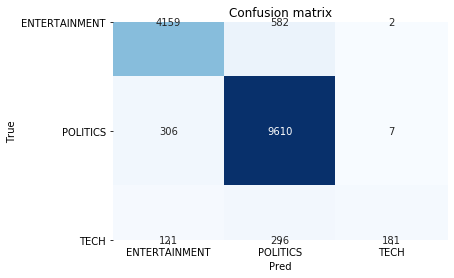

In [90]:
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)